In [36]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.layers import*
from keras.models import Sequential
from keras.utils import np_utils

In [37]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [38]:
##now creating a imagedatagenerator from augmentation of an image
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)
test_gen=ImageDataGenerator(
    rescale=1.0/255.0
)
val_generator=ImageDataGenerator(
    rescale=1.0/255.0
)


In [39]:
# here i will use image augmentation
#image pipeline,
#image dropouts
#first break data into training and validation set 
# and after finding correct epoch i willl find that for whole mnist training dataset


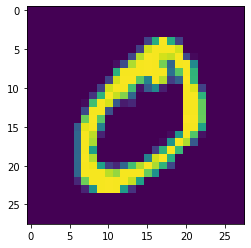

In [40]:
import numpy as np
new_x_train=x_train[:50000]
new_y_train=y_train[:50000]
val_x_train=x_train[50000:]
val_y_train=y_train[50000:]


new_x_t=np.zeros((50000,28,28,3))
new_x_t[:,:,:,0]=new_x_train
new_x_t[:,:,:,1]=new_x_train
new_x_t[:,:,:,2]=new_x_train
val_x_t=np.zeros((10000,28,28,3))
val_x_t[:,:,:,0]=val_x_train
val_x_t[:,:,:,1]=val_x_train
val_x_t[:,:,:,2]=val_x_train

new_x_train=new_x_train.reshape(50000,28,28,1)
val_x_train=val_x_train.reshape(10000,28,28,1)
plt.imshow(new_x_train[1].reshape(28,28))

In [41]:
data_gen.fit(new_x_train)
new_y_train=np_utils.to_categorical(new_y_train,10)
train_gen=data_gen.flow(new_x_train,new_y_train,batch_size=2048)
val_y_train=np_utils.to_categorical(val_y_train,10)
val_generator.fit(val_x_train)
val_gen=val_generator.flow(val_x_train,val_y_train,batch_size=2048)
#train_ids=np.array(train_gen)
x,y=train_gen.next()
print(x.shape,y.shape)

(2048, 28, 28, 1) (2048, 10)


In [42]:
#now my data generator and data augmentation all happen and i created my data for train,validity and test
#now i have to create a cnn model for this
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit_generator(train_gen,epochs=20,steps_per_epoch=24,validation_data=val_gen,validation_steps=4)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
24/24 [==============================] - 12s 498ms/step - loss: 2.2557 - accuracy: 0.1442 - val_loss: 1.4834 - val_accuracy: 0.5375
Epoch 2/20
24/24 [==============================] - 12s 481ms/step - loss: 1.8758 - accuracy: 0.3320 - val_loss: 1.0831 - val_accuracy: 0.6683
Epoch 3/20
24/24 [==============================] - 12s 479ms/step - loss: 1.5912 - accuracy: 0.4516 - val_loss: 0.9382 - val_accuracy: 0.7183
Epoch 4/20
24/24 [==============================] - 12s 480ms/step - loss: 1.4325 - accuracy: 0.5159 - val_loss: 0.8018 - val_accuracy: 0.7439
Epoch 5/20
24/24 [==============================] - 12s 481ms/step - loss: 1.3123 - accuracy: 0.5581 - val_loss: 0.7024 - val_accuracy: 0.7949
Epoch 6/20
24/24 [==============================] - 12s 479ms/step - loss: 1.2458 - accuracy: 0.5831 - val_loss: 0.6332 - val_accuracy: 0.8037
Epoch 7/20
24/24 [==============================] - 12s 481ms/step - loss: 1.1681 - accuracy: 0.6092 - val_loss: 0.5862 - val_accuracy: 0.8220

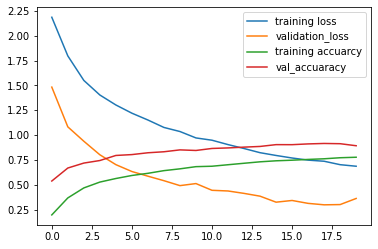

In [57]:
h=history.history
train_loss=h['loss']
train_acc=h['accuracy']
val_loss=h['val_loss']
val_accuracy=h['val_accuracy']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='validation_loss')
plt.plot(train_acc,label='training accuarcy')
plt.plot(val_accuracy,label='val_accuaracy')
plt.legend()
plt.show()